In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

#cargar_dataset
df_partidos = pd.read_csv("data/partidos_cebollitas.csv")

# Cerar variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

# Variables predictorias
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

# Divicion estandar: 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [6]:
from sklearn.linear_model import LinearRegression

# Instanciar y entrenar el modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

print("Modelo entrenado exitoasamente!! :)")

Modelo entrenado exitoasamente!! :)


In [7]:
# Mostrar coeficientes
print(f"Intercepto: {modelo_rl.intercept_}")
print(f"Coeficientes: {modelo_rl.coef_}")

# Interpretacion amigable
for idx, col_name in enumerate(X.columns):
    print(f"Si aumentamos una unidad en '{col_name}', la diferencia de goles cambia en promedio {modelo_rl.coef_[idx]:.2f}")

Intercepto: -2.5257192572329763
Coeficientes: [ 0.05596278 -0.05125811]
Si aumentamos una unidad en 'posesion_local (%)', la diferencia de goles cambia en promedio 0.06
Si aumentamos una unidad en 'tiros_arco_local', la diferencia de goles cambia en promedio -0.05


In [8]:
# Hacer predicciones
y_pred = modelo_rl.predict(X_test)

# comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['Diferencia_goles_real'] = y_test
df_resultados['Diferencia_goles_Predicha'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,Diferencia_goles_real,Diferencia_goles_Predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


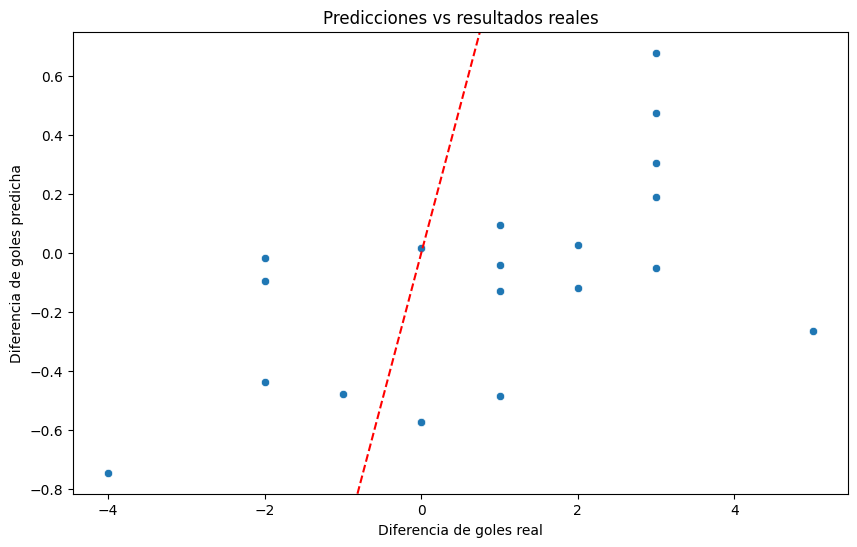

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear grafico de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y = y_pred)
plt.xlabel('Diferencia de goles real')
plt.ylabel('Diferencia de goles predicha')
plt.title('Predicciones vs resultados reales')
plt.axline((0,0), slope = 1, color = 'red', linestyle='--')
plt.show()

In [12]:
import ipywidgets as widgets

posesion_input = widgets.FloatSlider(min = 30, max = 70, step=1, description= 'posesion (%)')
tiros_input = widgets.IntSlider(min = 1, max = 15, step= 1, description = 'tiros al arco')

# Funcion de prediccion
def predecir_goles(posesion, tiros):
    entrada = pd.DataFrame([[posesion, tiros]], columns = ['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_rl.predict(entrada)[0]
    print(f"Diferencia de goles predicha: {pred:.2f}")

# Mostrar widget interactivo
widgets.interactive(predecir_goles, posesion = posesion_input, tiros = tiros_input)

interactive(children=(FloatSlider(value=30.0, description='posesion (%)', max=70.0, min=30.0, step=1.0), IntSl…